Mengimpor beberapa package khusus: Pands, Matplotlib (Pyplot), Seaborn, dan Scipy (untuk melihat koefisien korelasi).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

Mengimpor data CSV ke dataframe Panda, setelah itu dilakukan review data serta mengubah data yang bentuknya interger menjadi kategoris (khusus untuk data cp, thal, dan slope).

In [2]:
heart_data=pd.read_csv('heart.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
heart_data_disease=heart_data['target'].replace({0:1, 1:0})

In [7]:
heart_data.drop('target', axis=1, inplace=True)

In [8]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
heart_data['hdisease']=heart_data_disease

In [10]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hdisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [11]:
a = pd.get_dummies(heart_data['cp'], prefix = "cp")
b = pd.get_dummies(heart_data['thal'], prefix = "thal")
c = pd.get_dummies(heart_data['slope'], prefix = "slope")

In [12]:
frames = [heart_data, a, b, c]
heart_data = pd.concat(frames, axis = 1)
heart_data = heart_data.drop(columns = ['cp', 'thal', 'slope'])
heart_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


Dilakukan analisis deskriptif untuk melihat gambaran data.

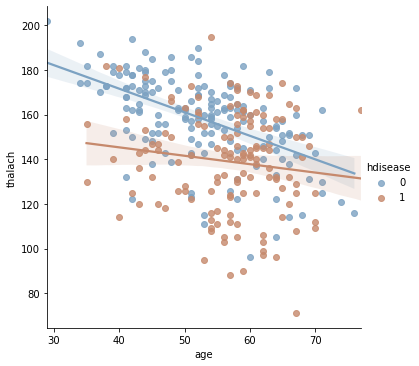

In [13]:
sns.lmplot(palette='twilight_shifted', 
           data=heart_data, x='age', y='thalach', hue='hdisease')

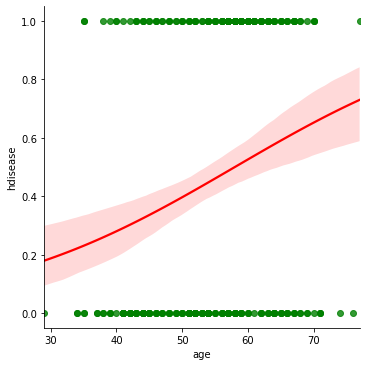

In [14]:
sns.lmplot(palette='Greens_r', data=heart_data, x='age', y='hdisease', 
           logistic=True, 
           line_kws={'color': 'red'}, scatter_kws={'color': 'green'})

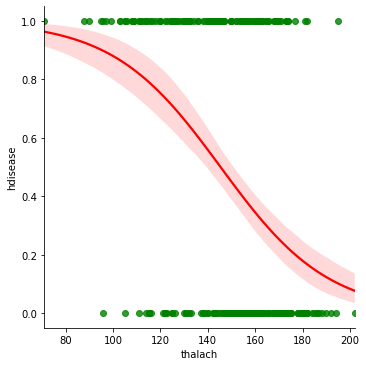

In [15]:
sns.lmplot(palette='Greens_r', data=heart_data, x='thalach', y='hdisease', 
           logistic=True, 
           line_kws={'color': 'red'}, scatter_kws={'color': 'green'})

<AxesSubplot:xlabel='age', ylabel='Count'>

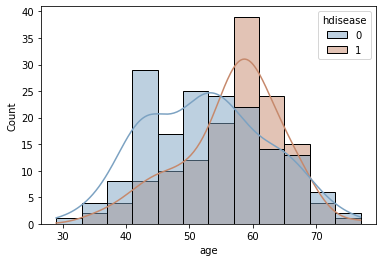

In [16]:
sns.histplot(data=heart_data, x='age', hue='hdisease', palette='twilight_shifted', kde=True)

Mengimport train_test_split dari package sklearn untuk memisahkan data training dan test.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = heart_data.drop(columns='hdisease')
y = heart_data['hdisease']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=21)

Melakukan analisis regresi logistik serta mengecek tingkat akurasinya dengan mengalikan skor test dengan 100.

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [22]:
accuracies = {}
acc = model.score(X_test,y_test)*100
accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 88.52%


Cara lain untuk mengecek tingkat akurasi, yaitu dengan membuat tabel klasifikasi.

In [23]:
predict = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



Memprediksi data baru.

In [26]:
#new_data = [[58, 76, 61833.9, 256.09, 0]] - bisa gunakan data frame asalkan formatnya sama
#predict_non_test = logmodel.predict(new_data)
#print(predict_non_test)